# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

During this project will be performed analyzing, cleaning up, and ploting data as well as pose questions and seek to answer them in a meaningful way.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

## Scoping

Most fof the time it is helpfull to screat a Scope of work and anilize each step for better performing. 
Four sections were created below to help guide the project's process and progress. 
The first section is the project goals, this section will define the high-level objectives and set the goals for this project. The next section is the data, data for the current project is already provided but still needs to be checked if project goals can be met with the available data. Third section is analysis will have to be thought through, which include the methods and questions that are aligned with the project goals. Lastly, the forth sectiion evaluation will help us build conclusions and findings from the analysis.

### Project Goals

In this project we will be going through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

### Data

This project has two data sets that came with the package. The first `csv` file contains data about different species and their conservation status; and second holds recorded sightings of different species at several national parks for the past 7 days. This data will be used to analyze the goals of the project and answer on the question.

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 

### Evaluation

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.

## Import Python Modules

First, import the primary modules that will be used in this project:

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Load Data
To analyze the status of conservation of species and their observations in national parks, load the datasets into `DataFrames`. Once loaded as `DataFrames` the data can be explored and visualized with Python.

In the next steps, `Observations.csv`  and `Species_info.csv` are read in as `DataFrames` called `observations` and `species` respectively. The newly created `DataFrames` are glimpsed with `.head()` to check its contents (loaded first 5 rows for review).

#### species

The `species_info.csv` contains information on the different species in the USA National Parks. The columns in the data set include:

- **category** - The class of animal
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - Each species’ current conservation status

After will check the dimensions of the data set. 

In [11]:
species = pd.read_csv('species_info.csv', encoding='utf-8')
species.head(5)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [12]:
print(f'species data set: {species.shape}')

species data set: (5824, 4)


#### observations

The `observations.csv` contains information about number of time each species are observed in the certain National Park. The columns in the data set include:

- **scientific_name** - The scientific name of each species
- **park_name** - Park where species were found
- **observations** - The number of times each species was observed at park

After will check the dimensions of the data set.

In [4]:
observations = pd.read_csv('observations.csv', encoding='utf-8')
observations.head(5)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
print(f'observations data set: {observations.shape}')

observations data set: (23296, 3)


#### Explore the Data
Once we have data, it’s a good idea to get acquainted with it. 

The first thing is to find the number of distinct species in the data. Use the column scientific_name to get 5,541 unique species - this was count across all national parks. 

In [6]:
print(f'number of unique species: {species.scientific_name.nunique()}')

number of unique species: 5541


All species devided into few categories. 

In [7]:
print(f'number of categories: {species.category.nunique()}')
print(f'categories are: {species.category.unique()}')

number of categories: 7
categories are: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


We also can count of `category` in the data. Vascular plants are by far the largest amount of species with 4,470 in the data, 
with reptiles being the fewest with 79.

In [8]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

#### Analysis 

In our first task we need to explore `conservation_status` of the species. 

In [9]:
print(f'number of conservation_status: {species.conservation_status.nunique()}')
print(f'conservation_status like: {species.conservation_status.unique()}')

number of conservation_status: 4
conservation_status like: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


We have 4 possible values and NaN. 

- `Species of Concern`: a plant or animal for which we have concerns about its ability to remain on a landscape for a long time
- `Threatened`: a species is likely to become endangered within the foreseeable future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: the process of restoring endangered and threatened species to the point where they no longer require the safeguards of the Endangered Species Act (ESA)


In [10]:
species.groupby('conservation_status').size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

In [14]:
conservationStatus_tb = species.groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()
conservationStatus_tb

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


In those cases where we have `NaN` - meaning that no species in the current `conservation status`. 
In next step uzing pandas `DataFrame.plot` we can show those results graphically, to visualize better the numbers.

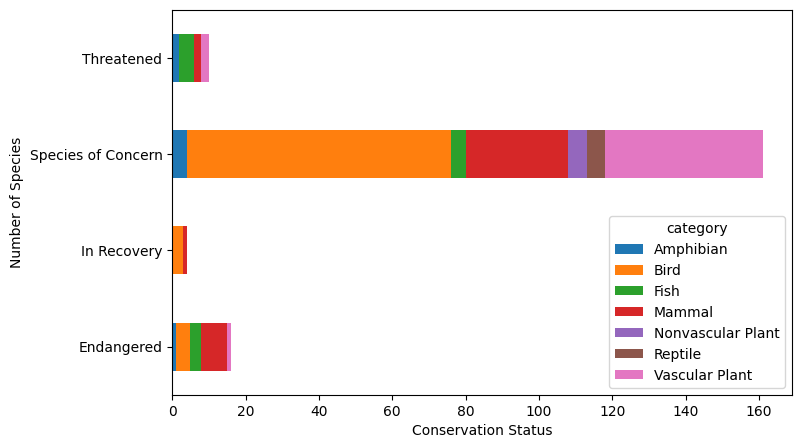

In [28]:
cs_plot = conservationStatus_tb.plot(kind = 'barh', figsize=(8,5), 
                               stacked=True)

cs_plot.set_xlabel("Conservation Status")
cs_plot.set_ylabel("Number of Species");